# Plot Figure 1

## Load data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Specify the name of the columns
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']

# Features
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Get the features
X = df[features].values

# Get the target
y = df['Class'].values

## Data preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

## Create the figure folder

In [3]:
import os

# Make directory
directory = os.path.dirname('../../../result/supplementary/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## The 2 $\times$ 4 matrix

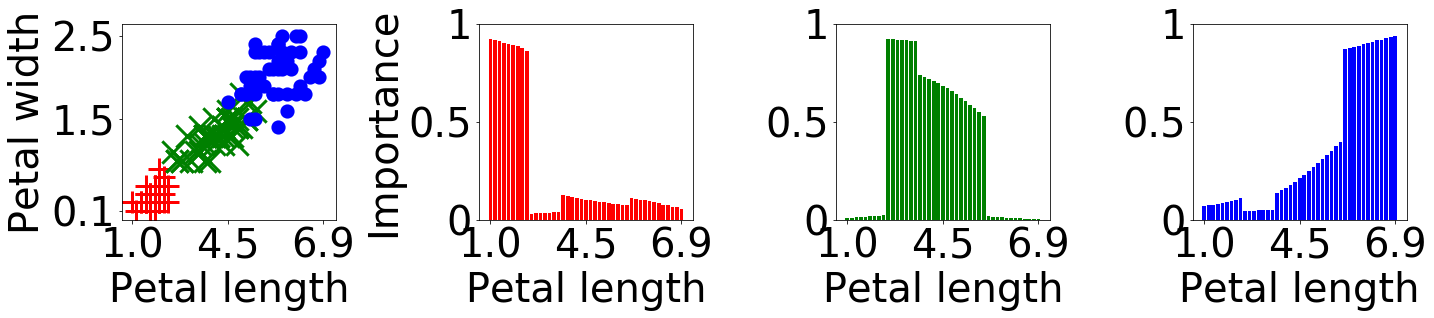

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4.5))

# Entry (0, 0): the scatter plot

# Get the x values
x_col = features.index('Petal length')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('Petal width')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red", "green", "blue"]
markers = ["+", "x", "."]
labels = ["1", "2", "3"]

# Get the data
data = {}
for num in range(3):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=500, linewidth=3, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([x_vals_u[0], x_vals_u[mid], x_vals_u[n - 1]], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('Petal width', fontsize=40)
ax.set_yticks([0, mid, n - 1])
ax.set_yticklabels([y_vals_u[0], y_vals_u[mid], y_vals_u[n - 1]], fontsize=40)

# Entry (0, 1): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/iris/prob_dists_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-setosa') & (df['xj'] == 'Petal length')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[1]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='red')
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([xijs[0], xijs[mid], xijs[n - 1]], fontsize=40)

ax.set_ylabel('Importance', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)

# Entry (0, 2): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/iris/prob_dists_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-versicolor') & (df['xj'] == 'Petal length')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([xijs[0], xijs[mid], xijs[n - 1]], fontsize=40)

# ax.set_ylabel('Probability', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)

# Entry (0, 3): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/iris/prob_dists_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-virginica') & (df['xj'] == 'Petal length')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='blue')
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([xijs[0], xijs[mid], xijs[n - 1]], fontsize=40)

# ax.set_ylabel('Probability', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)

fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/iris_fiblr.pdf', dpi=300)
plt.show()

# The plot distribution function

In [5]:
def plot_distribution(row, col, file_name, class_name, feature_name, color, label, fontsize, title, xlabel, ylabel, xticks, xticklabels, decimal_place):    
    # Load the distribution file
    df = pd.read_csv(file_name, header=0)
    
    # Specify the name of the columns
    df.columns = ['yu', 'xj', 'xij', 'pij']
    
    df = df.loc[(df['yu'] == class_name) & (df['xj'] == feature_name)]

    # Get the feature values
    xijs = df['xij'].values

    # Get the probabilities
    pijs = df['pij'].values

    ax = axs[row][col]
    
    # Plot the bar chart
    ax.bar(range(len(xijs)), pijs, color=color, label=label)
    
    if label is not None:
        ax.legend(fontsize=fontsize)
        
    if title is not None:
        ax.set_title(title, fontsize=fontsize)
        
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=fontsize)
        
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=fontsize)

    n = len(xijs)
    if xticks is None:
        ax.set_xticks([0, n - 1])
    else:
        ax.set_xticks(xticks)

    if xticklabels is None:
        ax.set_xticklabels([round(xijs[0], decimal_place) if decimal_place is not None else int(xijs[0]),
                            round(xijs[n - 1], decimal_place) if decimal_place is not None else int(xijs[n - 1])], 
                           fontsize=fontsize)     
    else:
        ax.set_xticklabels(xticklabels, fontsize=fontsize)
        
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([0, 0.5, 1], fontsize=fontsize)

# Plot Figure 2

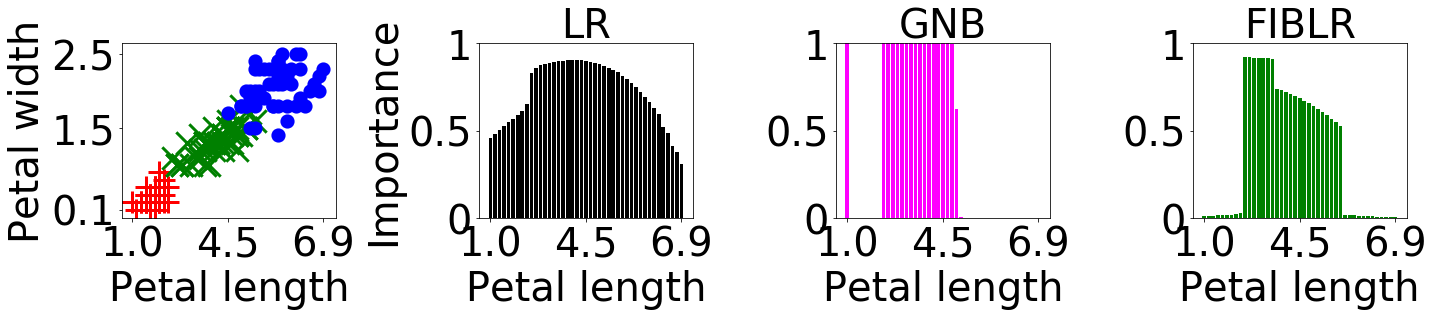

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4.5))

# Entry (0, 0): the scatter plot

# Get the x values
x_col = features.index('Petal length')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('Petal width')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red", "green", "blue"]
markers = ["+", "x", "."]
labels = ["1", "2", "3"]

# Get the data
data = {}
for num in range(3):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=500, linewidth=3, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([x_vals_u[0], x_vals_u[mid], x_vals_u[n - 1]], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('Petal width', fontsize=40)
ax.set_yticks([0, mid, n - 1])
ax.set_yticklabels([y_vals_u[0], y_vals_u[mid], y_vals_u[n - 1]], fontsize=40)

# Entry (0, 1): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/iris/prob_dists_file/LogisticRegression/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-versicolor') & (df['xj'] == 'Petal length')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[1]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='black')
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([xijs[0], xijs[mid], xijs[n - 1]], fontsize=40)

ax.set_ylabel('Importance', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('LR', fontsize=40)

# Entry (0, 2): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/iris/prob_dists_file/GaussianNB/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-versicolor') & (df['xj'] == 'Petal length')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='magenta')
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([xijs[0], xijs[mid], xijs[n - 1]], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('GNB', fontsize=40)

# Entry (0, 3): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/iris/prob_dists_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-versicolor') & (df['xj'] == 'Petal length')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('Petal length', fontsize=40)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([xijs[0], xijs[mid], xijs[n - 1]], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('FIBLR', fontsize=40)
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/iris_lr_gnb_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 3

## Load data

In [7]:
import pandas as pd

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data', header=0)

# Features
features = ['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

# Get the features
X = df[features].values

# Get the target
y = df['status'].values

## Data preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

## The 1 $\times$ 4 matrix

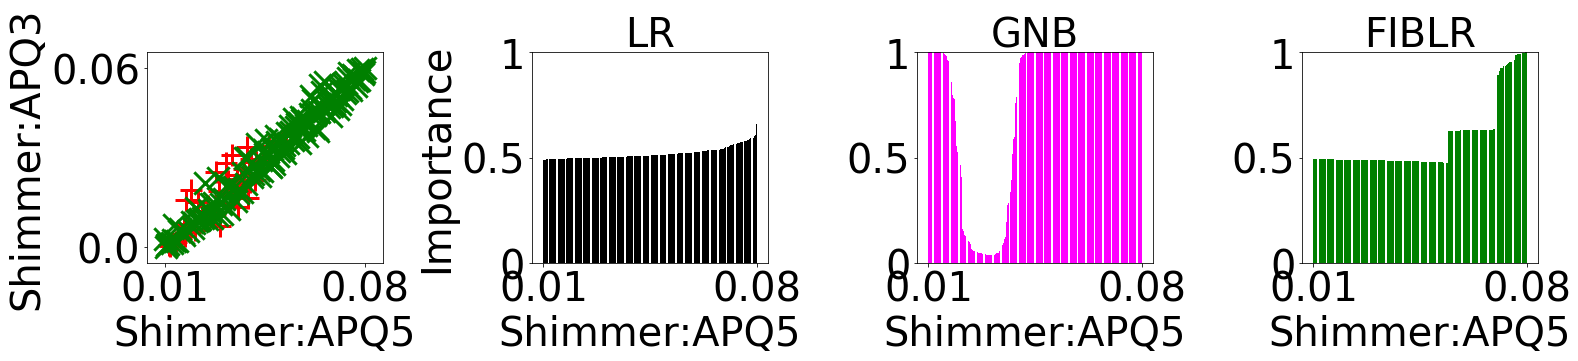

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(22, 5))

# Entry (0, 0): the scatter plot

# Get the x values
x_col = features.index('Shimmer:APQ5')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('Shimmer:APQ3')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red", "green"]
markers = ["+", "x"]
labels = ["0", "1"]

# Get the data
data = {}
for num in range(2):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=500, linewidth=3, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('Shimmer:APQ5', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(x_vals_u[0], 2), round(x_vals_u[n - 1], 2)], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('Shimmer:APQ3', fontsize=40)
ax.set_yticks([0, n - 1])
ax.set_yticklabels([round(y_vals_u[0], 2), round(y_vals_u[n - 1], 2)], fontsize=40)

# Entry (0, 1): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/parkinsons/prob_dists_file/LogisticRegression/parkinsons.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'Shimmer:APQ5')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[1]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='black')
ax.set_xlabel('Shimmer:APQ5', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(xijs[0], 2), round(xijs[n - 1], 2)], fontsize=40)

ax.set_ylabel('Importance', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('LR', fontsize=40)

# Entry (0, 2): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/parkinsons/prob_dists_file/GaussianNB/parkinsons.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'Shimmer:APQ5')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='magenta')
ax.set_xlabel('Shimmer:APQ5', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(xijs[0], 2), round(xijs[n - 1], 2)], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('GNB', fontsize=40)

# Entry (0, 3): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/parkinsons/prob_dists_file/parkinsons.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'Shimmer:APQ5')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('Shimmer:APQ5', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(xijs[0], 2), round(xijs[n - 1], 2)], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('FIBLR', fontsize=40)
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/parkinsons_lr_gnb_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 4

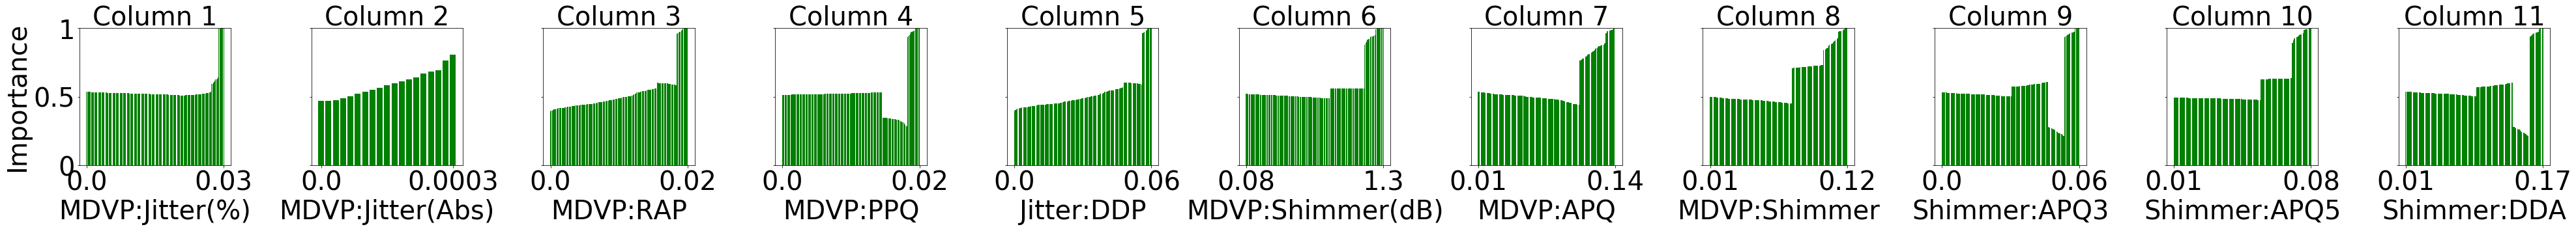

In [10]:
file_names = '../../../result/fiblr/parkinsons/prob_dists_file/parkinsons.csv'

# The row number
nrows = 1

# The column number
ncols = 11

# The class names
class_names = [1] * ncols

# The feature names
feature_names = ['MDVP:Jitter(%)', 
                 'MDVP:Jitter(Abs)', 
                 'MDVP:RAP', 
                 'MDVP:PPQ',
                 'Jitter:DDP',
                 'MDVP:Shimmer(dB)',
                 'MDVP:APQ',
                 'MDVP:Shimmer',
                 'Shimmer:APQ3',
                 'Shimmer:APQ5',
                 'Shimmer:DDA'] * 2

# The colors
colors = ['green'] * ncols

# The labels
labels = [None] * nrows * ncols

# The fontsize
fontsize = 40

# The titles
titles = ['Column ' + str(i) for i in range(1, ncols + 1)]

# The xlabels
xlabels = feature_names

# The ylabels
ylabels = ['Importance'] + [None] * nrows * (ncols - 1)

# The xticks
xticks = [None] * nrows * ncols

# The xticklabels
xticklabels = [None] + [[0.0, 0.0003]] + [None] * (ncols -2)

# The decimal places
decimal_places = [2] * nrows * ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(55, 5), squeeze=False)

for row in range(nrows):
    for col in range(ncols):
        idx = row * ncols + col
        plot_distribution(row,
                          col,
                          file_names, 
                          class_names[idx], 
                          feature_names[idx], 
                          colors[idx],
                          labels[idx],
                          fontsize,
                          titles[idx],
                          xlabels[idx],
                          ylabels[idx],
                          xticks[idx],
                          xticklabels[idx],
                          decimal_places[idx])
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/parkinsons_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 5

## Load data

In [11]:
import pandas as pd

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', header=None)

# Specify the name of the columns
df.columns = ['ID',
 'Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive',
 'SS',
 'Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'Semer',
 'VSA']

# Features
features = ['Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive',
 'SS']

# Combine CL1 to CL6 into CL7
for i in range(1, 7):
    df = df.replace('CL' + str(i), 'CL7')

# Get the features
X = df[features].values

# Get the target
y = df['Heroin'].values

## Data preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

## The 1 $\times$ 4 matrix

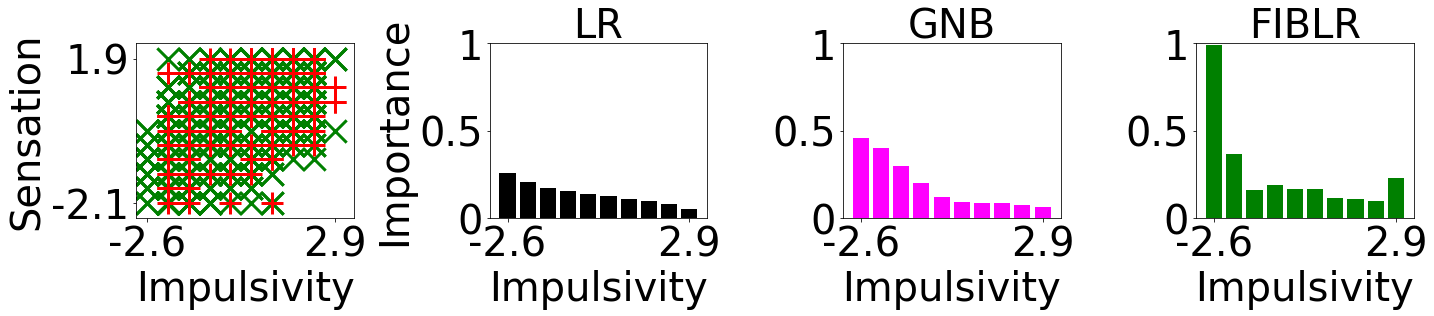

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4.5))

# Entry (0, 0): the scatter plot

# Get the x values
x_col = features.index('Impulsive')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('SS')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["green", "red"]
markers = ["x", "+"]
labels = ["0", "1"]

# Get the data
data = {}
for num in range(2):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=500, linewidth=3, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('Impulsivity', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(x_vals_u[0], 1), round(x_vals_u[n - 1], 1)], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('Sensation', fontsize=40)
ax.set_yticks([0, n - 1])
ax.set_yticklabels([round(y_vals_u[0], 1), round(y_vals_u[n - 1], 1)], fontsize=40)

# Entry (0, 1): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/drug_consumption/Heroin/prob_dists_file/LogisticRegression/drug_consumption.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'CL0') & (df['xj'] == 'Impulsive')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[1]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='black', label='LR')
ax.set_xlabel('Impulsivity', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(xijs[0], 1), round(xijs[n - 1], 1)], fontsize=40)

ax.set_ylabel('Importance', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('LR', fontsize=40)

# Entry (0, 2): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/drug_consumption/Heroin/prob_dists_file/GaussianNB/drug_consumption.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'CL0') & (df['xj'] == 'Impulsive')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='magenta')
ax.set_xlabel('Impulsivity', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(xijs[0], 1), round(xijs[n - 1], 1)], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('GNB', fontsize=40)

# Entry (0, 3): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/drug_consumption/Heroin/prob_dists_file/drug_consumption.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'CL0') & (df['xj'] == 'Impulsive')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('Impulsivity', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([round(xijs[0], 1), round(xijs[n - 1], 1)], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('FIBLR', fontsize=40)
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/drug_consumption_lr_gnb_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 6

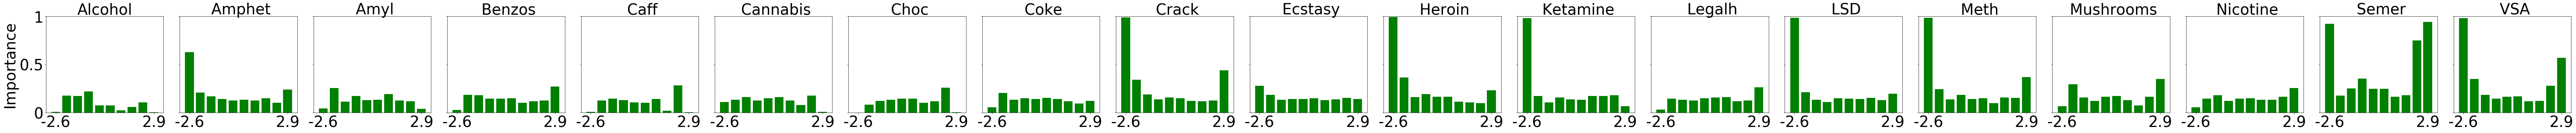

In [14]:
# The file names
drugs = 'Alcohol, Amphet, Amyl, Benzos, Caff, Cannabis, Choc, Coke, Crack, Ecstasy, Heroin, Ketamine, Legalh, LSD, Meth, Mushrooms, Nicotine, Semer, VSA'.split(',')
file_names = ['../../../result/fiblr/drug_consumption/'+ drug.strip() + '/prob_dists_file/drug_consumption.csv'for drug in drugs] * 2

# The row number
nrows = 1

# The column number
ncols = 19

# The class names
class_names = ['CL0'] * ncols

# The feature names
feature_names = ['Impulsive'] * 2 * ncols

# The colors
colors = ['green'] * ncols

# The labels
labels = [None] * nrows * ncols

# The fontsize
fontsize = 40

# The titles
titles = drugs

# The xlabels
xlabels = [None] * nrows * ncols

# The ylabels
ylabels = ['Importance'] + [None] * nrows * (ncols - 1)

# The xticks
xticks = [None] * nrows * ncols

# The xticklabels
xticklabels = [None] * ncols

# The decimal places
decimal_places = [1] * nrows * ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(95, 5), squeeze=False)

for row in range(nrows):
    for col in range(ncols):
        idx = row * ncols + col
        plot_distribution(row,
                          col,
                          file_names[idx], 
                          class_names[idx], 
                          feature_names[idx], 
                          colors[idx],
                          labels[idx],
                          fontsize,
                          titles[idx],
                          xlabels[idx],
                          ylabels[idx],
                          xticks[idx],
                          xticklabels[idx],
                          decimal_places[idx])
    
fig.tight_layout()
plt.show()

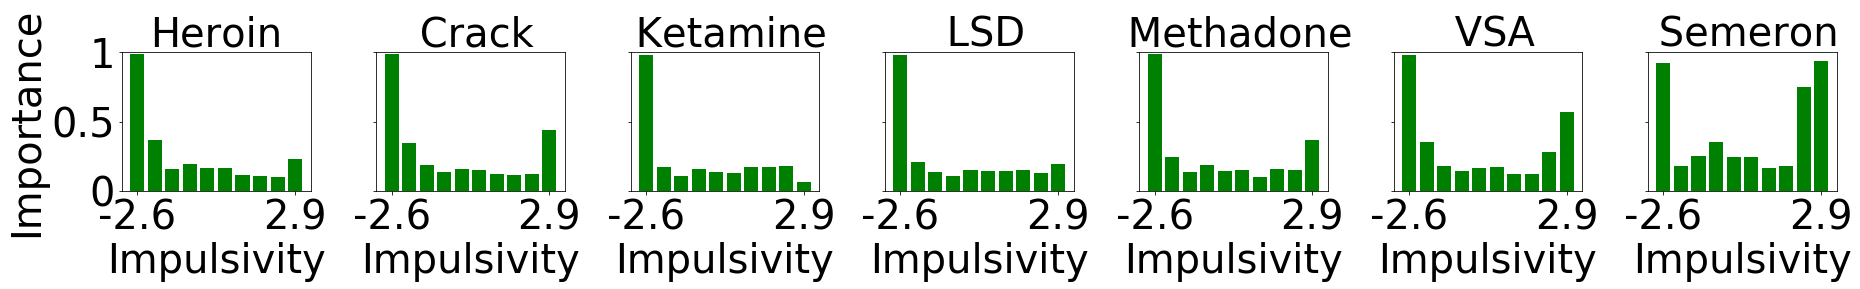

In [15]:
# The file names
drugs = 'Heroin, Crack, Ketamine, LSD, Meth, VSA, Semer'.split(',')
file_names = ['../../../result/fiblr/drug_consumption/'+ drug.strip() + '/prob_dists_file/drug_consumption.csv'for drug in drugs] * 2

# The row number
nrows = 1

# The column number
ncols = 7

# The class names
class_names = ['CL0'] * ncols

# The feature names
feature_names = ['Impulsive'] * 2 * ncols

# The colors
colors = ['green'] * ncols

# The labels
labels = [None] * nrows * ncols

# The fontsize
fontsize = 40

# The titles
titles = 'Heroin, Crack, Ketamine, LSD, Methadone, VSA, Semeron'.split(',')

# The xlabels
xlabels = ['Impulsivity'] * nrows * ncols

# The ylabels
ylabels = ['Importance'] + [None] * nrows * (ncols - 1)

# The xticks
xticks = [None] * nrows * ncols

# The xticklabels
xticklabels = [None] * ncols

# The decimal places
decimal_places = [1] * nrows * ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(26, 4), squeeze=False)

for row in range(nrows):
    for col in range(ncols):
        idx = row * ncols + col
        plot_distribution(row,
                          col,
                          file_names[idx], 
                          class_names[idx], 
                          feature_names[idx], 
                          colors[idx],
                          labels[idx],
                          fontsize,
                          titles[idx],
                          xlabels[idx],
                          ylabels[idx],
                          xticks[idx],
                          xticklabels[idx],
                          decimal_places[idx])
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/drug_consumption_fiblr_impulsive_informative.pdf', dpi=300)
plt.show()

# Plot Figure 7

## Load data

In [16]:
import pandas as pd

# Load the data
df = pd.read_csv('../../../data/drosophila_enhancers/drosophila_enhancers.data.csv', header=0)

# Features
features = ['r6start', 'r6stop', 'H3_c12', 'H3_c14a', 'H3_c14c', 'H3_c8', 'H3K18ac_c12', 'H3K18ac_c14a', 'H3K18ac_c14c', 'H3K18ac_c8', 'H3K27ac_c12', 'H3K27ac_c14a', 'H3K27ac_c14c', 'H3K27ac_c8', 'H3K27me3_c12', 'H3K27me3_c14a', 'H3K27me3_c14c', 'H3K36me3_c12', 'H3K36me3_c14a', 'H3K36me3_c14c', 'H3K4me1_c12', 'H3K4me1_c14a', 'H3K4me1_c14c', 'H3K4me1_c8', 'H3K4me3_c12', 'H3K4me3_c14a', 'H3K4me3_c14c', 'H3K4me3_c8', 'H3K9ac_c12', 'H3K9ac_c14a', 'H3K9ac_c14c', 'H3K9ac_c8', 'H4K5ac_c12', 'H4K5ac_c14a', 'H4K5ac_c14c', 'H4K5ac_c8', 'H4K8ac_c12', 'H4K8ac_c14a', 'H4K8ac_c14c', 'H4K8ac_c8', 'input_c12', 'input_c14a', 'input_c14c', 'input_c8', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'bcd1', 'bcd2', 'cad1', 'D1', 'da2', 'dl3', 'ftz3', 'gt2', 'h1', 'h2', 'hb1', 'hb2', 'hkb1', 'hkb2', 'hkb3', 'kni1', 'kni2', 'kr1', 'kr2', 'mad2', 'med2', 'prdBQ', 'prdFQ', 'run1', 'run2', 'shn2', 'shn3', 'slp1', 'sna1', 'sna2', 'tll1', 'twi1', 'twi2', 'z2']

# Get the features
X = df[features].values

# Get the target
y = df['positive'].values

## Data preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

## The 1 $\times$ 4 matrix

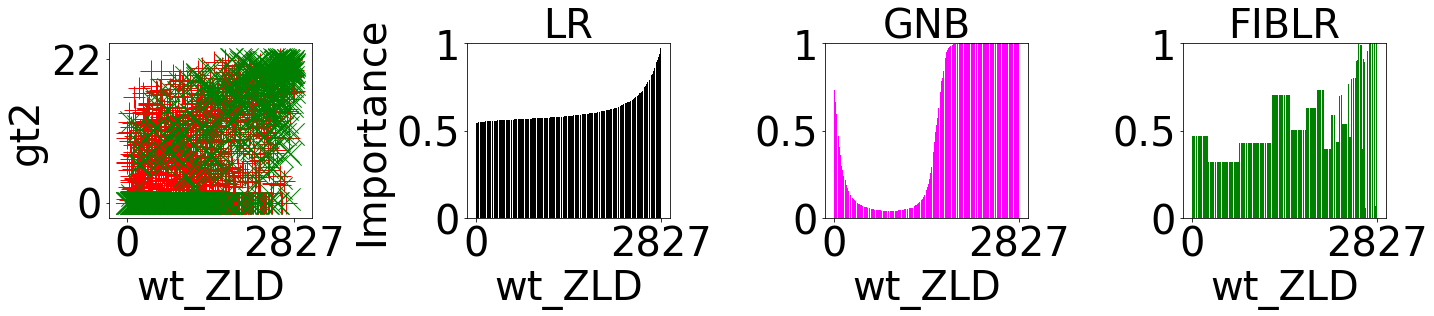

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4.5))

# Entry (0, 0): the scatter plot

# Get the x values
x_col = features.index('wt_ZLD')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('gt2')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red", "green"]
markers = ["+", "x"]
labels = ["0", "1"]

# Get the data
data = {}
for num in range(2):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=500, linewidth=1, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('wt_ZLD', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(x_vals_u[0]), int(x_vals_u[n - 1])], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('gt2', fontsize=40)
ax.set_yticks([0, n - 1])
ax.set_yticklabels([int(y_vals_u[0]), int(y_vals_u[n - 1])], fontsize=40)

# Entry (0, 1): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/drosophila_enhancers/prob_dists_file/LogisticRegression/drosophila_enhancers.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'wt_ZLD')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[1]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='black', label='LR')
ax.set_xlabel('wt_ZLD', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=40)

ax.set_ylabel('Importance', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('LR', fontsize=40)

# Entry (0, 2): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/drosophila_enhancers/prob_dists_file/GaussianNB/drosophila_enhancers.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'wt_ZLD')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='magenta')
ax.set_xlabel('wt_ZLD', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('GNB', fontsize=40)

# Entry (0, 3): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/drosophila_enhancers/prob_dists_file/drosophila_enhancers.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'wt_ZLD')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('wt_ZLD', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('FIBLR', fontsize=40)
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/drosophila_enhancers_lr_gnb_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 8

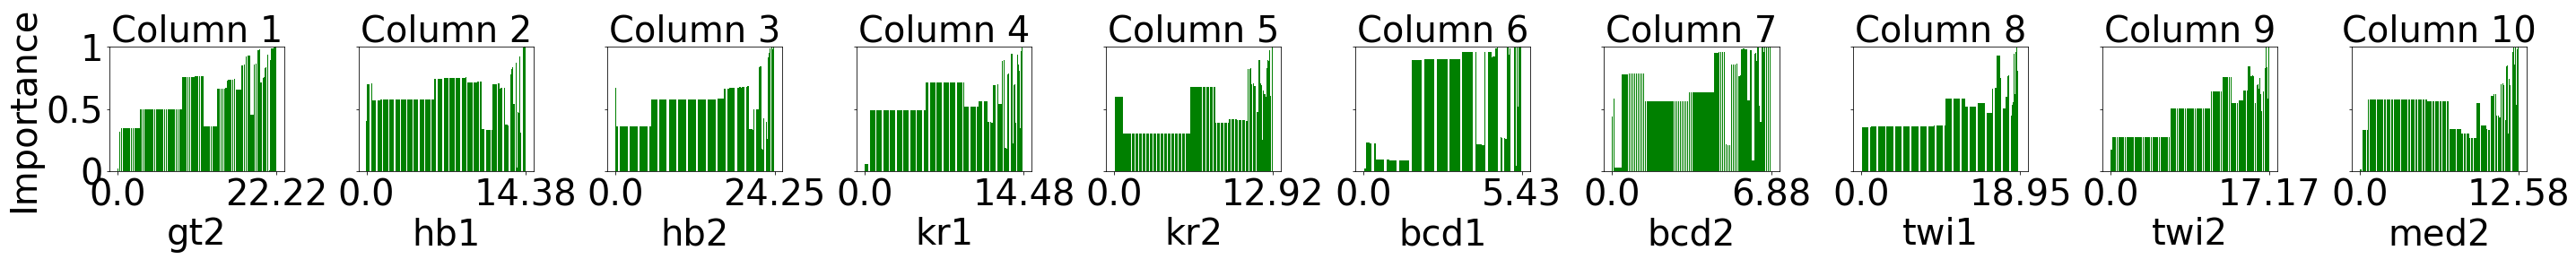

In [19]:
file_names = '../../../result/fiblr/drosophila_enhancers/prob_dists_file/drosophila_enhancers.csv'

# The row number
nrows = 1

# The column number
ncols = 10

# The class names
class_names = [1] * ncols

# The feature names
feature_names = ['gt2', 
                 'hb1',
                 'hb2',
                 'kr1',
                 'kr2',
                 'bcd1',
                 'bcd2',
                 'twi1', 
                 'twi2', 
                 'med2']

# The colors
colors = ['green'] * ncols

# The labels
labels = [None] * nrows * ncols

# The fontsize
fontsize = 40

# The titles
titles = ['Column ' + str(i) for i in range(1, ncols + 1)]

# The xlabels
xlabels = feature_names

# The ylabels
ylabels = ['Importance'] + [None] * nrows * (ncols - 1)

# The xticks
xticks = [None] * nrows * ncols

# The xticklabels
xticklabels = [None] * nrows * ncols

# The decimal places
decimal_places = [2] * nrows * ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(40, 4), squeeze=False)

for row in range(nrows):
    for col in range(ncols):
        idx = row * ncols + col
        plot_distribution(row,
                          col,
                          file_names, 
                          class_names[idx], 
                          feature_names[idx], 
                          colors[idx],
                          labels[idx],
                          fontsize,
                          titles[idx],
                          xlabels[idx],
                          ylabels[idx],
                          xticks[idx],
                          xticklabels[idx],
                          decimal_places[idx])
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/drosophila_enhancers_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 9

## Load data

In [20]:
import pandas as pd

# Load the data
df = pd.read_csv('../../../data/alternative_splicing/alternative_splicing.data.csv', header=0)

# Features
features = ['MYC_body_UTA', 'CTCF_body_UTA', 'POLR2A_body_UTA', 'ARID3A_body_Stanford', 'ATF1_body_HMS', 'ATF3_body_HMS', 'BACH1_body_Stanford', 'BDP1_body_HMS', 'BHLHE40_body_Stanford', 'BRF1_body_HMS', 'BRF2_body_HMS', 'SMARCA4_body_Stanford', 'CCNT2_body_HMS', 'CUX1_body_Stanford', 'FOS_body_Yale', 'CEBPB_body_Stanford', 'CHD2_body_Stanford', 'JUN_body_Stanford', 'JUN_body_Yale', 'JUN_body_Yale.1', 'JUN_body_Yale.2', 'JUN_body_Stanford.1', 'JUN_body_Yale.3', 'MYC_body_Yale', 'MYC_body_Yale.1', 'MYC_body_Stanford', 'MYC_body_Yale.2', 'MYC_body_Stanford.1', 'MYC_body_Yale.3', 'RCOR1_body_Stanford', 'RCOR1_body_Stanford.1', 'E2F4_body_USC', 'CTCF_body_Stanford', 'E2F6_body_USC', 'ELK1_body_Stanford', 'GATA1_body_USC', 'GATA1_body_Stanford', 'GATA2_body_USC', 'GTF2B_body_HMS', 'GTF2F1_body_Stanford', 'HCFC1_body_Stanford', 'HMGN3_body_HMS', 'SMARCB1_body_Stanford', 'IRF1_body_Stanford', 'IRF1_body_Stanford.1', 'IRF1_body_Stanford.2', 'IRF1_body_Stanford.3', 'TRIM28_body_USC', 'JUND_body_Stanford', 'MAFF_body_Stanford', 'MAFK_body_Stanford', 'MAX_body_Stanford', 'MAX_body_Yale', 'MXI1_body_Stanford', 'NFE2_body_Yale', 'NFYA_body_Stanford', 'NFYB_body_Stanford', 'NRF1_body_Stanford', 'EP300_body_Stanford', 'EP300_body_Stanford.1', 'POLR2A_body_Yale', 'POLR2A_body_Yale.1', 'POLR2A_body_Stanford', 'POLR2A_body_Yale.2', 'POLR2A_body_Stanford.1', 'POLR2A_body_Yale.3', 'POLR2AphosphoS2_body_Stanford', 'POLR2AphosphoS2_body_Stanford.1', 'POLR3G_body_Stanford', 'RAD21_body_Yale', 'RFX5_body_Stanford', 'POLR3A_body_HMS', 'SETDB1_body_USC', 'SETDB1_body_USC.1', 'SIRT6_body_HMS', 'STAT1_body_Yale', 'SMC3_body_Stanford', 'STAT1_body_Yale.1', 'STAT1_body_Stanford', 'STAT1_body_Stanford.1', 'STAT2_body_Yale', 'STAT2_body_Yale.1', 'TAL1_body_Stanford', 'TBL1XR1_body_Stanford', 'TBL1XR1_body_Stanford.1', 'TBP_body_Stanford', 'GTF3C2_body_HMS', 'NR2C2_body_USC', 'UBTF_body_Stanford', 'UBTF_body_Stanford.1', 'USF2_body_Stanford', 'XRCC4_body_Yale', 'YY1_body_USC', 'ZNF143_body_Stanford', 'ZNF263_body_USC', 'ZNF274_body_USC', 'ZNF274_body_USC.1', 'ZNF384_body_Stanford', 'ZMIZ1_body_Stanford', 'eGFP.FOS_body_UChicago', 'eGFP.GATA2_body_UChicago', 'eGFP.HDAC8_body_UChicago', 'eGFP.JUNB_body_UChicago', 'eGFP.JUND_body_UChicago', 'eGFP.NR4A1_body_UChicago', 'CTCF_body_UW', 'CTCF_body_UW.1', 'CHD1_body_ENCODE', 'CTCF_body_ENCODE', 'EZH2_body_ENCODE', 'HDAC1_body_ENCODE', 'HDAC2_body_ENCODE', 'HDAC6_body_ENCODE', 'EP300_body_ENCODE', 'PHF8_body_ENCODE', 'KDM5B_body_ENCODE', 'POLR2A_body_ENCODE', 'RBBP5_body_ENCODE', 'SAP30_body_ENCODE', 'ATF3_body_ENCODE', 'BCL3_body_ENCODE', 'CBX3_body_ENCODE', 'CEBPB_body_ENCODE', 'CTCF_body_ENCODE.1', 'CTCFL_body_ENCODE', 'E2F6_body_ENCODE', 'EGR1_body_ENCODE', 'ELF1_body_ENCODE', 'ETS1_body_ENCODE', 'FOSL1_body_ENCODE', 'GABPA_body_ENCODE', 'GATA2_body_ENCODE', 'HDAC2_body_ENCODE.1', 'MAX_body_ENCODE', 'MEF2A_body_ENCODE', 'NR2F2_body_ENCODE', 'REST_body_ENCODE', 'PML_body_ENCODE', 'POLR2AphosphoS5_body_ENCODE', 'POLR2A_body_ENCODE.1', 'SPI1_body_ENCODE', 'RAD21_body_ENCODE', 'SIN3A_body_ENCODE', 'SIX5_body_ENCODE', 'SP1_body_ENCODE', 'SP2_body_ENCODE', 'SRF_body_ENCODE', 'STAT5A_body_ENCODE', 'TAF1_body_ENCODE', 'TAF7_body_ENCODE', 'TEAD4_body_ENCODE', 'THAP1_body_ENCODE', 'USF1_body_ENCODE', 'YY1_body_ENCODE', 'YY1_body_ENCODE.1', 'ZBTB33_body_ENCODE', 'ZBTB7A_body_ENCODE', 'ARID3A_body_ENCODE', 'ATF1_body_ENCODE', 'ATF3_body_ENCODE.1', 'BACH1_body_ENCODE', 'BDP1_body_ENCODE', 'BHLHE40_body_ENCODE', 'BRF1_body_ENCODE', 'BRF2_body_ENCODE', 'SMARCA4_body_ENCODE', 'CCNT2_body_ENCODE', 'CEBPB_body_ENCODE.1', 'FOS_body_ENCODE', 'CHD2_body_ENCODE', 'JUN_body_ENCODE', 'JUN_body_ENCODE.1', 'JUN_body_ENCODE.2', 'JUN_body_ENCODE.3', 'JUN_body_ENCODE.4', 'MYC_body_ENCODE', 'MYC_body_ENCODE.1', 'MYC_body_ENCODE.2', 'MYC_body_ENCODE.3', 'MYC_body_ENCODE.4', 'MYC_body_ENCODE.5', 'RCOR1_body_ENCODE', 'RCOR1_body_ENCODE.1', 'CTCF_body_ENCODE.2', 'E2F4_body_ENCODE', 'E2F6_body_ENCODE.1', 'ELK1_body_ENCODE', 'GATA1_body_ENCODE', 'GATA2_body_ENCODE.1', 'GTF2B_body_ENCODE', 'GTF2F1_body_ENCODE', 'HMGN3_body_ENCODE', 'SMARCB1_body_ENCODE', 'IRF1_body_ENCODE', 'IRF1_body_ENCODE.1', 'IRF1_body_ENCODE.2', 'IRF1_body_ENCODE.3', 'JUND_body_ENCODE', 'TRIM28_body_ENCODE', 'MAFF_body_ENCODE', 'MAFK_body_ENCODE', 'MAX_body_ENCODE.1', 'MXI1_body_ENCODE', 'NFE2_body_ENCODE', 'NFYA_body_ENCODE', 'NFYB_body_ENCODE', 'NRF1_body_ENCODE', 'EP300_body_ENCODE.1', 'POLR2A_body_ENCODE.2', 'POLR2A_body_ENCODE.3', 'POLR2A_body_ENCODE.4', 'POLR2A_body_ENCODE.5', 'POLR2A_body_ENCODE.6', 'POLR2A_body_ENCODE.7', 'POLR2AphosphoS2_body_ENCODE', 'POLR3G_body_ENCODE', 'RAD21_body_ENCODE.1', 'RFX5_body_ENCODE', 'POLR3A_body_ENCODE', 'SETDB1_body_ENCODE', 'SETDB1_body_ENCODE.1', 'SIRT6_body_ENCODE', 'SMC3_body_ENCODE', 'STAT1_body_ENCODE', 'STAT1_body_ENCODE.1', 'STAT1_body_ENCODE.2', 'STAT1_body_ENCODE.3', 'STAT2_body_ENCODE', 'STAT2_body_ENCODE.1', 'TAL1_body_ENCODE', 'TBL1XR1_body_ENCODE', 'TBL1XR1_body_ENCODE.1', 'TBP_body_ENCODE', 'GTF3C2_body_ENCODE', 'NR2C2_body_ENCODE', 'UBTF_body_ENCODE', 'UBTF_body_ENCODE.1', 'USF2_body_ENCODE', 'YY1_body_ENCODE.2', 'ZNF143_body_ENCODE', 'ZNF263_body_ENCODE', 'ZNF274_body_ENCODE', 'ZNF274_body_ENCODE.1', 'MYC_body_ENCODE.6', 'CTCF_body_ENCODE.3', 'POLR2A_body_ENCODE.8', 'CTCF_body_ENCODE.4', 'POLR2AphosphoS2_body_ENCODE.1', 'eGFP.FOS_body_ENCODE', 'eGFP.GATA2_body_ENCODE', 'eGFP.HDAC8_body_ENCODE', 'eGFP.JUNB_body_ENCODE', 'eGFP.JUND_body_ENCODE', 'H3K27ac_body_Broad', 'H3K27me3_body_Broad', 'H3K36me3_body_Broad', 'H3K4me1_body_Broad', 'H3K4me2_body_Broad', 'H3K4me3_body_Broad', 'H3K79me2_body_Broad', 'H3K9ac_body_Broad', 'H3K9me1_body_Broad', 'H3K9me3_body_Broad', 'H4K20me1_body_Broad', 'H3K27me3_body_UW', 'H3K27me3_body_UW.1', 'H3K36me3_body_UW', 'H3K36me3_body_UW.1', 'H3K4me3_body_UW', 'H3K4me3_body_UW.1']

# Get the features
X = df[features].values

# Get the target
y = df['label'].values

## Data preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

## The 1 $\times$ 4 matrix

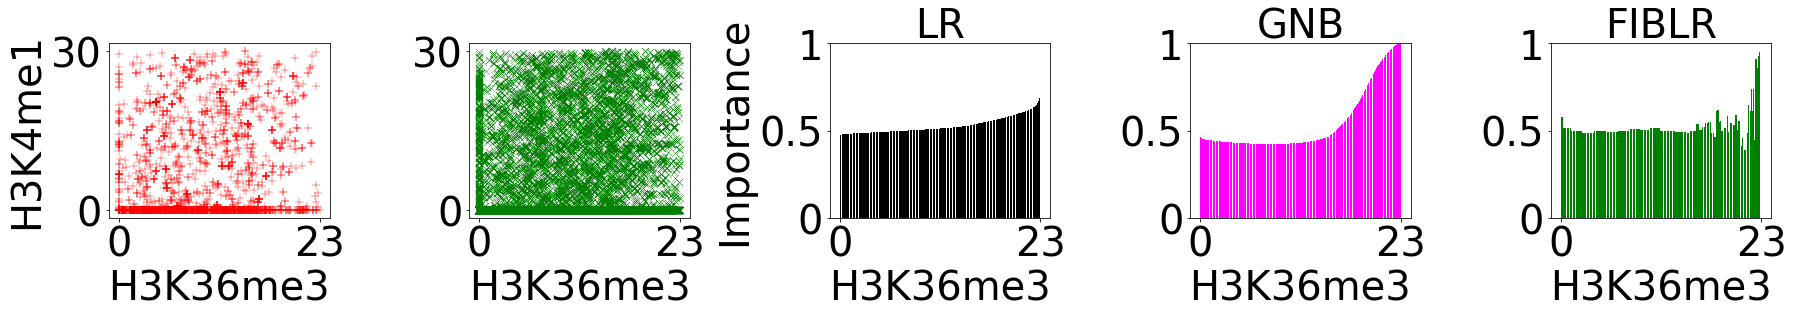

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 4.5))

# Entry (0, 0): the scatter plot

# Get the x values
x_col = features.index('H3K36me3_body_Broad')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('H3K4me1_body_Broad')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red"]
markers = ["+"]
labels = ["0"]

# Get the data
data = {}
for num in range(1):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=50, linewidth=0.4, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('H3K36me3', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(x_vals_u[0]), int(x_vals_u[n - 1])], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('H3K4me1', fontsize=40)
ax.set_yticks([0, n - 1])
ax.set_yticklabels([int(y_vals_u[0]), int(y_vals_u[n - 1])], fontsize=40)

# Entry (0, 1): the scatter plot

# Get the x values
x_col = features.index('H3K36me3_body_Broad')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('H3K4me1_body_Broad')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["green"]
markers = ["x"]
labels = ["1"]

# Get the data
data = {}
for num in range(1, 2):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[1]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=50, linewidth=0.4, label=label)

# ax.legend(loc=(-0.18, 0.1), shadow=True, fontsize=40, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('H3K36me3', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(x_vals_u[0]), int(x_vals_u[n - 1])], fontsize=40)

n = len(y_vals_u)
mid = n // 2
ax.set_yticks([0, n - 1])
ax.set_yticklabels([int(y_vals_u[0]), int(y_vals_u[n - 1])], fontsize=40)

# Entry (0, 2): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/alternative_splicing/prob_dists_file/LogisticRegression/alternative_splicing.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'H3K36me3_body_Broad')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='black', label='LR')
ax.set_xlabel('H3K36me3', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=40)

ax.set_ylabel('Importance', fontsize=40)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('LR', fontsize=40)

# Entry (0, 3): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/others/alternative_splicing/prob_dists_file/GaussianNB/alternative_splicing.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'H3K36me3_body_Broad')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='magenta')
ax.set_xlabel('H3K36me3', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('GNB', fontsize=40)

# Entry (0, 4): importance distribution

# Load the distribution file
df = pd.read_csv('../../../result/fiblr/alternative_splicing/prob_dists_file/alternative_splicing.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 1) & (df['xj'] == 'H3K36me3_body_Broad')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[4]

# Get the length of x_vals and the mid index
n = len(xijs)
mid = n // 2
# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('H3K36me3', fontsize=40)
ax.set_xticks([0, n - 1])
ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=40)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=40)
ax.set_title('FIBLR', fontsize=40)
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/alternative_splicing_lr_gnb_fiblr.pdf', dpi=300)
plt.show()

# Plot Figure 8

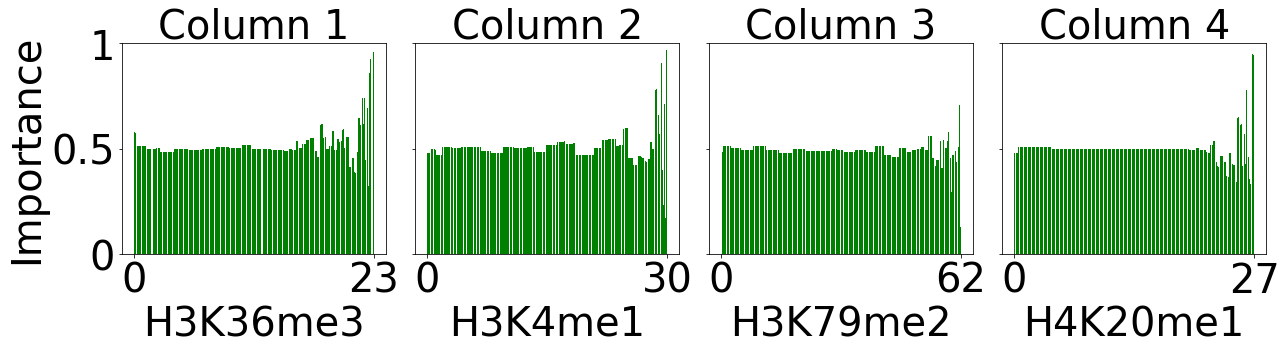

In [23]:
file_names = '../../../result/fiblr/alternative_splicing/prob_dists_file/alternative_splicing.csv'

# The row number
nrows = 1

# The column number
ncols = 4

# The class names
class_names = [1] * ncols

# The feature names
feature_names = ['H3K36me3_body_Broad',
                 'H3K4me1_body_Broad',
                 'H3K79me2_body_Broad',
                 'H4K20me1_body_Broad']

# The colors
colors = ['green'] * ncols

# The labels
labels = [None] * nrows * ncols

# The fontsize
fontsize = 40

# The titles
titles = ['Column ' + str(i) for i in range(1, ncols + 1)]

# The xlabels
xlabels = ['H3K36me3',
           'H3K4me1',
           'H3K79me2',
           'H4K20me1']

# The ylabels
ylabels = ['Importance'] + [None] * nrows * (ncols - 1)

# The xticks
xticks = [None] * nrows * ncols

# The xticklabels
xticklabels = [None] * nrows * ncols

# The decimal places
decimal_places = [None] * nrows * ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(18, 5), squeeze=False)

for row in range(nrows):
    for col in range(ncols):
        idx = row * ncols + col
        plot_distribution(row,
                          col,
                          file_names, 
                          class_names[idx], 
                          feature_names[idx], 
                          colors[idx],
                          labels[idx],
                          fontsize,
                          titles[idx],
                          xlabels[idx],
                          ylabels[idx],
                          xticks[idx],
                          xticklabels[idx],
                          decimal_places[idx])
    
fig.tight_layout()
plt.savefig('../../../result/supplementary/figure/alternative_splicing.pdf', dpi=300)
plt.show()